<a href="https://colab.research.google.com/github/iqbalamr/ESP32-CAM---Smart-Traffic-Violation-System/blob/master/119140161_RC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Samsung Z Flip Sentiment Analysis**


---


Author : *Iqbal Amrulloh*
*iqbal.119140161@student.itera.ac.id*


---


Objective:


1.   Sentiment Analysis
2.   Sentiment Classification
3.   Data Visualization


---




**Input Library** 
Memasukkan library yang digunakan dalam pemrosesan data

In [ ]:
import numpy as np #linear algebra
import tweepy #untuk akses Twitter API
import csv #membuat file ccv
import pandas as pd #data processing

#Processing
import re #menghapus non-letter karakter
from textblob import TextBlob #library sentimen

#Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

**Deklarasi API**


In [ ]:
api_key = "dBGFXAqWEDlN0exuYLGdD2xZ3"
api_key_secret = "lUuOWci0dCDsKIIwCWxlR63HaXLwXdiOe3l3FrohYTYDpjGFLr"
access_token = "1115166567984029696-EyY7aUwLEHsl84swlfYT6eJiG1jKWo"
access_token_secret = "5YpIZrCmQAsv9UhO57rWD1CYqbpISsLvwFPkG6n4mYs9C"

**Mengumpulkan Data**

**Mengklasifikasi Data**

In [ ]:
#set akses API
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
search_key = "z flip" #keyword pencarian

#Membuat csv file
csvFile = open("119140161_RC.csv", "a+", newline = "", encoding="utf-8")
csvWriter = csv.writer(csvFile)

#Membuat list teks dan label hasil analisis
t = []
hasil_analisis = []

#Perulangan untuk pengumpulan dan klasifikasi data
for tweet in tweepy.Cursor(api.search, q = search_key, count = 2000, lang='en', 
                           since = "2020-01-01").items():
  clean_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",
                                tweet.text.lower()).split())
  #print(clean_tweet)
  analysis = TextBlob(clean_tweet)

  #Klasifikasi Label Berdasarkan nilai polaritas
  an = analysis.sentiment.polarity
  if an > 0.0:
    an = "Positive"
  elif an == 0.0:
    an = "Neutral"
  else:
    an = "Negative"
  #Agar tidak ada data duplikat RT
  if tweet.retweet_count > 0:
    if an not in hasil_analisis:
      hasil_analisis.append(an)
      t.append(clean_tweet)
  else:
    hasil_analisis.append(an)
    t.append(clean_tweet)

  #Menuliskan isi file csv
  tweets = [clean_tweet, an]
  csvWriter.writerow(tweets)


**Eksplorasi Data**

In [ ]:
#Membuat data frame dari list 
dictTweets = {"teks": t, "category": hasil_analisis}
df = pd.DataFrame(dictTweets,columns=["teks", "category"])
df

,teks,category
0,it s not a flip and it s not a fold so what s ...,Neutral
1,l pigg jay z gonna show me how to flip that un...,Positive
2,humphries like every single one that you are i...,Negative
3,samsung galaxy z flip 3 5g factory unlocked an...,Neutral
4,this is neat reminds me of the gba sp it s the...,Neutral
...,...,...
823,the one i have z flip 3 can be used to emulate...,Neutral
824,idk if i wanna keep this z flip or get the new...,Positive
825,is anyone rocking the flip z,Neutral
826,what is your opinion on the new apple iphones ...,Positive


In [ ]:
#dimensi dataframe
df.shape

(828, 2)

**Visualisasi Data**

In [ ]:
df.groupby('category').count().plot(kind='bar')

In [ ]:
# Kalkulasi panjang tweets
tweet_len = pd.Series([len(tweet.split()) for tweet in df['teks']])

# Distribusi panjang teks dari tweets
tweet_len.plot(kind='box')

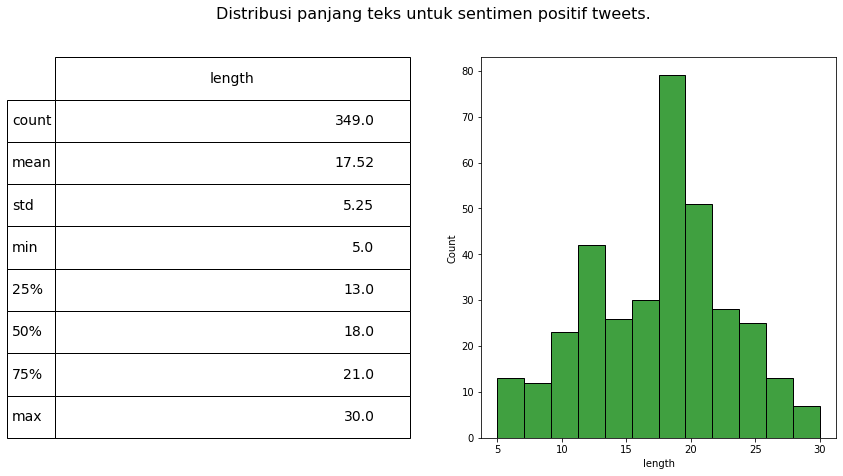

In [ ]:
 fig = plt.figure(figsize=(14,7))
df['length'] = df.teks.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribusi panjang teks untuk sentimen positif tweets.', fontsize=16)

plt.show()

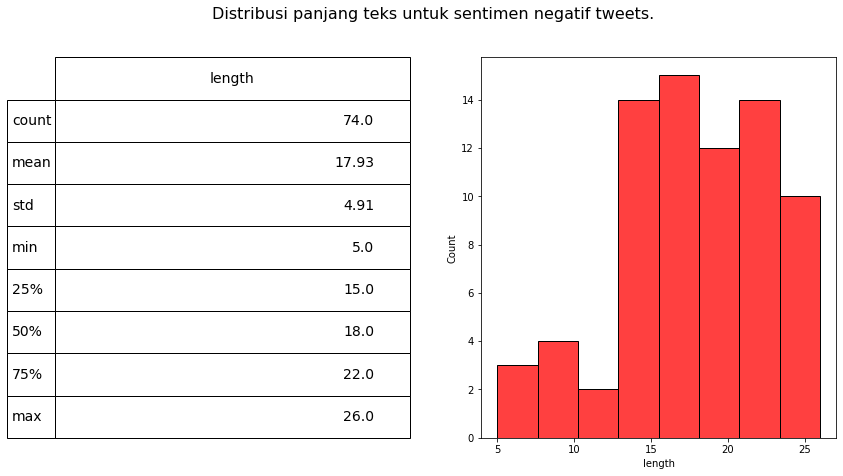

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.teks.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribusi panjang teks untuk sentimen negatif tweets.', fontsize=16)

plt.show()

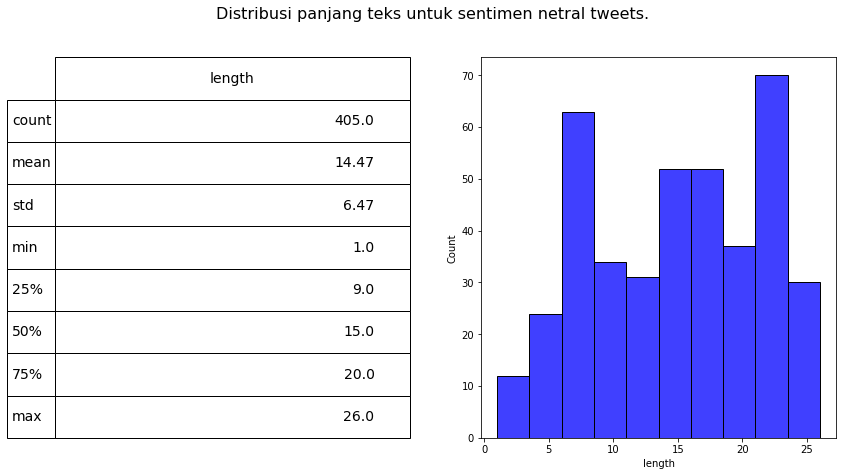

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.teks.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Neutral']['length'], ax=ax1,color='blue')
describe = df.length[df.category=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribusi panjang teks untuk sentimen netral tweets.', fontsize=16)

plt.show()

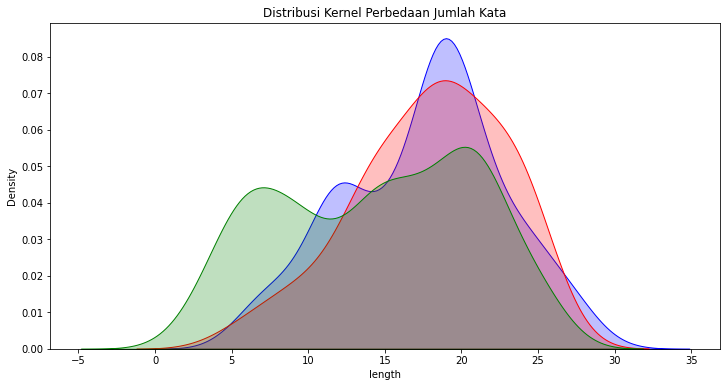

In [ ]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df[df['category']=='Positive']['length'], shade=True, color="b").set_title('Distribusi Kernel Perbedaan Jumlah Kata')
p2=sns.kdeplot(df[df['category']=='Negative']['length'], shade=True, color="r")
p3=sns.kdeplot(df[df['category']=='Neutral']['length'], shade=True, color="g")

In [ ]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart Analisis Sentimen')
fig.show()

In [ ]:
#Membuat visualisasi wordcloud
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # menggabungkan semua teks tweet
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['teks']])
                          
    # Inisialisasi wordcloud objek
    wc = WordCloud(background_color='white', 
                   max_words=100, 
                   stopwords = STOPWORDS)

    # Generate dan plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('Kata-Kata Sentimen {}'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
     

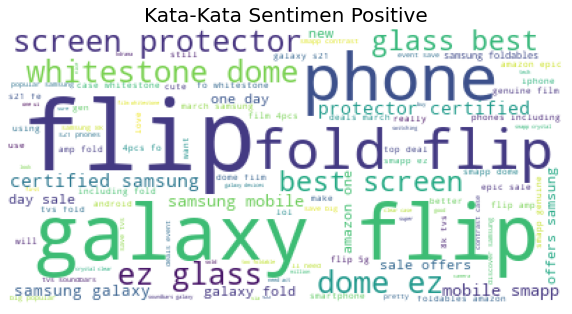

In [ ]:
# Positive tweet words
wordcount_gen(df, 'Positive')

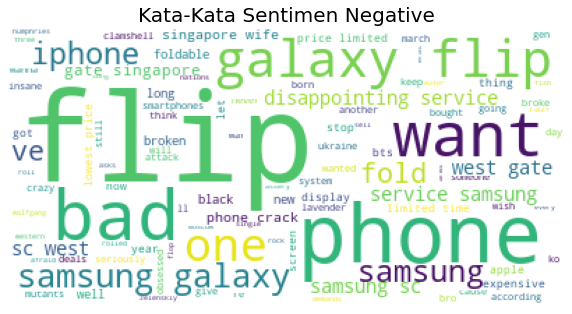

In [ ]:
# Negative tweet words
wordcount_gen(df, 'Negative')

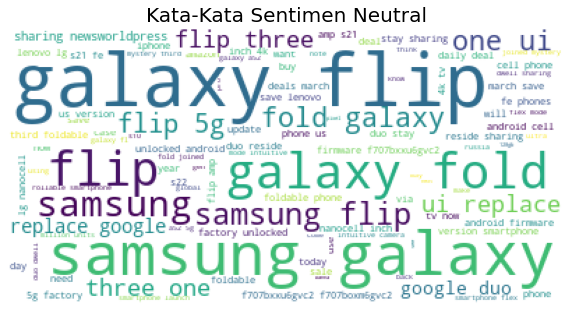

In [ ]:
# Neutral tweet words
wordcount_gen(df, 'Neutral')